# Lab 8
## Punto a

#Analisis peor caso:

###Lema 1: Si en la $n(n-1)$ iteración(cada proponente ha propuesto y sido rechazado $n-1$ veces), el algoritmo de Gale-Shapley no ha terminado, queda a lo sumo un proponente libre.

Dem: Supongamos que existen $2 \leq p $ proponetes libre, así quedan p espacios libres lo que significa que no se ha propuesto a ninguno de esos esos p espacios, así cada proponente ha propuesto $(n - p)$ veces, lo cual es una contradicción.

###Proposición: El peor caso para el algoritmo de Gale-Shapley es $n(n-1) - n + 2$ días.

Se tiene n proponentes y notese que ninguno puede ser rechazado n veces ya que quedaría una pareja sola, así cada proponente puede ser rechazado a lo mas $n(n-1)$ veces. Como el algoritmo de Gale-Shapley garantiza parejas estables, una vez se haya cumplido estas $n(n-1)$ iteraciones por el lema 1, quedara a lo sumo un proponente libre que necesitara una iteración mas para alcanzar una pareja, así el máximo de iteraciones es $n(n-1) + 1$.
Como el primer día se hacen n iteraciones entonces el numero de días es $n(n-1) + 1 + (-n + 1) = n(n-1) - n + 2$.

Una forma de alcanzar esto es dejando que despues de el primer día quede solo un proponente quede libre por iteración hasta que todos alcancen $n-1$ propuestas, usando los siguientes casos:
$$Hombres$$
\begin{matrix}
 a_1 & b_1& ... & b_3 & b_{n-1} & b_n \\
 a_2 & b_2& ... & b_{n-1} & b_1 & b_n\\ 
 ... & ...& ... & ... & ... & ...\\   ... & ...& ... & ... & ... & ...\\
 a_{n-1}  & b_{n-1}& b_1 & ... & b_{n-2} & b_n\\
 a_n & b_1& ... & b_3 & b_{n-1} & b_n
\end{matrix}\
$$Mujeres$$

\begin{matrix}
 b_1 & a_2& a_3 & ... & a_n & a_1 \\
 b_2 & a_3& ... & a_n & a_1 & a_2 \\ 
... & ...& ... & ... & ... & ...\\
 ... & ...& ... & ... & ... & ...\\
 b_{n-1} & a_5& a_1 & a_2 & ... & a_{n-1}\\
 b_n & a_2& a_3 & ... & a_n & a_1 \end{matrix}\
 Aquí en el primer día todos los hombres $a_i$ con $i \in \{1, ..., n -1\}$ quedaran emparejados primero con la mujer $b_i$, y cuando el hombre $a_n$ proponga, dejara al hombre $a1$ por fuera, el siguiente día $a_1$ propondrá a $b_2$ y esta dejara solo a $a_2$, quien el siguiente día propondrá a $b_3$ dejando solo a $a_3$, asi hasta que $a_{n-2}$ proponga a $b_n-1$, dejando a $a_{n-1}$ quien propondrá a 1 dejando a $a_n$ solo y empezando el ciclo de nuevo. Como este input deja un hombre solo por iteración despues del primer día, es un ejemplo de peor caso.
#Analisis mejor caso
Este se da cuando solo tiene que hacer n iteraciones(un día), por ejemplo:
$$Hombres$$
\begin{matrix}
 a_1 & b_1& ... & b_3 & b_{n-1} & b_n \\
 a_2 & b_2& ... & b_{n-1} & b_1 & b_n\\ 
 ... & ...& ... & ... & ... & ...\\   ... & ...& ... & ... & ... & ...\\
 a_n & b_n& b1 & b_2 & ... & b_{n-1}
\end{matrix}\
$$Mujeres$$

\begin{matrix}
 b_1 & a_1& a_2 & a_3 & ... & a_n \\
 b_2 & a_2& a_3 & ... & a_n & a_1 \\ 
... & ...& ... & ... & ... & ...\\
 b_n & a_n& a_1 & a_2 & ... & a_{n-1} \end{matrix}




In [ ]:
def setWorst(n,d):
  m = []
  w = []
  for i in range(n):
    mi = []
    wi = []
    s = 0
    for ii in range(n):
      if (i + ii+ 1)%n == 0:
        s =1
      wi.append((i + ii + 1)%n)
      mi.append((i + ii +s)%n + d)
    mi[n-1] = n - 1 + d
    w.append(wi)
    m.append(mi)
  return [m,w]

In [ ]:
def setBest(n,d):
  m = []
  w = []
  for i in range(n):
    mi = []
    wi = []
    for ii in range(n):
      mi.append((i + ii)%(n+1) + d)
      wi.append((i + ii)%(n+1))
    m.append(mi)
    w.append(wi)
  return [m,w]

#Alg 1

In [ ]:
  '''
MIT License

Copyright (c) 2018 Vishal Kancharla

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.
'''
  def stableMatching(n, menPreferences, womenPreferences, f):
    # Initially, all n men are unmarried
    unmarriedMen = list(range(n))
    # None of the men has a spouse yet, we denote this by the value None
    manSpouse = [None] * n                      
    # None of the women has a spouse yet, we denote this by the value None
    womanSpouse = [None] * n                      
    # Each man made 0 proposals, which means that 
    # his next proposal will be to the woman number 0 in his list
    nextManChoice = [0] * n                       
    count = 0
    # While there exists at least one unmarried man:
    while unmarriedMen:
        count = count + 1
        # Pick an arbitrary unmarried man
        he = unmarriedMen[0]                      
        # Store his ranking in this variable for convenience
        hisPreferences = menPreferences[he]       
        # Find a woman to propose to
        she = hisPreferences[nextManChoice[he]] 
        # Store her ranking in this variable for convenience
        herPreferences = womenPreferences[she]
        # Find the present husband of the selected woman (it might be None)
        currentHusband = womanSpouse[she]
       
        
        # Now "he" proposes to "she". 
        # Decide whether "she" accepts, and update the following fields
        # 1. manSpouse
        # 2. womanSpouse
        # 3. unmarriedMen
        # 4. nextManChoice
        if currentHusband == None:
          #No Husband case
          #"She" accepts any proposal
          womanSpouse[she] = he
          manSpouse[he] = she
          #"His" nextchoice is the next woman
          #in the hisPreferences list
          nextManChoice[he] = nextManChoice[he] + 1
          #Delete "him" from the 
          #Unmarried list
          unmarriedMen.pop(0)
        else:
          #Husband exists
          #Check the preferences of the 
          #current husband and that of the proposed man's
          currentIndex = herPreferences.index(currentHusband)
          hisIndex = herPreferences.index(he)
          #Accept the proposal if 
          #"he" has higher preference in the herPreference list
          if currentIndex > hisIndex:
             #New stable match is found for "her"
             womanSpouse[she] = he
             manSpouse[he] = she
             nextManChoice[he] = nextManChoice[he] + 1
             #Pop the newly wed husband
             unmarriedMen.pop(0)
             #Now the previous husband is unmarried add
             #him to the unmarried list
             unmarriedMen.insert(0,currentHusband)
          else:
             nextManChoice[he] = nextManChoice[he] + 1
             
           
            
    if f==1:
      print("n:",n,", Iterations: ",count, "(n(n-1) +1):", n*(n-1) + 1)
    elif f == 0:
      print("n:",n,", Iterations: ",count)
    else:
      return count
    
# Credits code: https://github.com/Vishal-Kancharla/Gale-Shapley-Algorithm


##Peor de los casos $n=4$

In [ ]:
s = setWorst(4, 0)
stableMatching(4, s[0], s[1], 1)

n: 4 , Iterations:  13 (n(n-1) +1): 13


##Peor de los casos $n=40$

In [ ]:
s = setWorst(40, 0)
stableMatching(40, s[0], s[1], 1)

n: 40 , Iterations:  1561 (n(n-1) +1): 1561


##Mejor de los casos $n=4$

In [ ]:
s = setBest(4, 0)
stableMatching(4,s[0],s[1], 0) 

n: 4 , Iterations:  4


##Mejor de los casos $n=40$

In [ ]:
s = setBest(40, 0)
stableMatching(40,s[0],s[1], 0) 

n: 40 , Iterations:  40


#Alg 2

In [ ]:
# Python3 program for stable marriage problem 

# Number of Men or Women 

# This function returns true if 
# woman 'w' prefers man 'm1' over man 'm' 
def wPrefersM1OverM(prefer, w, m, m1, N): 
	
	# Check if w prefers m over her 
	# current engagment m1 
	for i in range(N): 
		
		# If m1 comes before m in lisr of w, 
		# then w prefers her current engagement, 
		# don't do anything 
		if (prefer[w][i] == m1): 
			return True

		# If m cmes before m1 in w's list, 
		# then free her current engagement 
		# and engage her with m 
		if (prefer[w][i] == m): 
			return False

# Prints stable matching for N boys and N girls. 
# Boys are numbered as 0 to N-1. 
# Girls are numbereed as N to 2N-1. 
def stableMarriage(prefer,N,f): 
	
	# Stores partner of women. This is our output 
	# array that stores paing information. 
	# The value of wPartner[i] indicates the partner 
	# assigned to woman N+i. Note that the woman numbers 
	# between N and 2*N-1. The value -1 indicates 
	# that (N+i)'th woman is free 
	wPartner = [-1 for i in range(N)] 

	# An array to store availability of men. 
	# If mFree[i] is false, then man 'i' is free, 
	# otherwise engaged. 
	mFree = [False for i in range(N)] 

	freeCount = N
  
	count = 0

	# While there are free men 
	while (freeCount > 0): 
		count = count + 1
		# Pick the first free man (we could pick any) 
		m = 0
		while (m < N): 
			if (mFree[m] == False): 
				break
			m += 1

		# One by one go to all women according to 
		# m's preferences. Here m is the picked free man 
		i = 0
		while i < N and mFree[m] == False: 
			w = prefer[m][i] 

			# The woman of preference is free, 
			# w and m become partners (Note that 
			# the partnership maybe changed later). 
			# So we can say they are engaged not married 
			if (wPartner[w - N] == -1): 
				wPartner[w - N] = m 
				mFree[m] = True
				freeCount -= 1

			else: 
				
				# If w is not free 
				# Find current engagement of w 
				m1 = wPartner[w - N] 

				# If w prefers m over her current engagement m1, 
				# then break the engagement between w and m1 and 
				# engage m with w. 
				if (wPrefersM1OverM(prefer, w, m, m1,N) == False): 
					wPartner[w - N] = m 
					mFree[m] = True
					mFree[m1] = False
			i += 1

			# End of Else 
		# End of the for loop that goes 
		# to all women in m's list 
	# End of main while loop 

	# Prthe solution 
	if f:
		print("n:",N,", Iterations: ",count, "(n(n-1) +1):", N*(N-1) + 1)
	else:
		print("n:",N,", Iterations: ",count)



# This code is contributed by Mohit Kumar 


##Peor de los casos $n=4$

In [ ]:
s = setWorst(4, 4)
stableMarriage(s[0] + s[1],4,1) 

n: 4 , Iterations:  13 (n(n-1) +1): 13


##Peor de los casos $n=40$

In [ ]:
s = setWorst(40, 40)
stableMarriage(s[0] + s[1],40,1) 

n: 40 , Iterations:  1561 (n(n-1) +1): 1561


##Mejor de los casos $n=4$

In [ ]:
s = setBest(4, 4)
stableMarriage(s[0] + s[1],4,0)

n: 4 , Iterations:  4


##Mejor de los casos $n=40$

In [ ]:
s = setBest(4, 4)
stableMarriage(s[0] + s[1],4,0)

n: 4 , Iterations:  4


#Punto b


In [ ]:
import random
import numpy as np

def genInput(n):
  r = []
  for i in range(0, n):
    r.append(np.random.permutation(n).tolist())
  return r

##$n=4$

Min:
4
Max:
12
Prom:
6.33


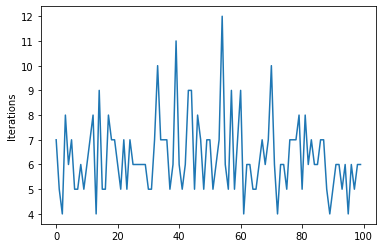

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
man = ['a','b','c','d']
wo = ['A','B','C','D']
li = []
pp = 0

for i in range(100):
  ws = genInput(4)
  ms = genInput(4)
  w = pd.DataFrame(list(map(list, zip(*ws))), index = man, columns = wo)
  m = pd.DataFrame(ms, index = man, columns = wo)
  pp = pp + stableMatching(4, ms, ws, 2)
  li.append(stableMatching(4, ms, ws, 2))

print("Min:")
print(min(li))
print("Max:")
print(max(li))
print("Prom:")
print(pp/100)
plt.plot(li)
plt.ylabel('Iterations')
plt.show()

##$n=40$

Min:
76
Max:
287
Prom:
159.24


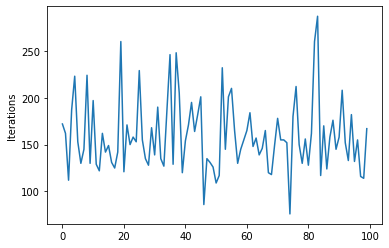

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
man = list(range(1, 41))
wo = list(range(1, 41))
li = []
pp = 0

for i in range(100):
  ws = genInput(40)
  ms = genInput(40)
  w = pd.DataFrame(list(map(list, zip(*ws))), index = man, columns = wo)
  m = pd.DataFrame(ms, index = man, columns = wo)
  pp = pp + stableMatching(40, ms, ws, 2)
  li.append(stableMatching(40, ms, ws, 2))

print("Min:")
print(min(li))
print("Max:")
print(max(li))
print("Prom:")
print(pp/100)
plt.plot(li)
plt.ylabel('Iterations')
plt.show()